In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ratings_Electronics (1).csv')


In [4]:
df.shape

(7824481, 4)

In [5]:
df.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [6]:
df.columns = ['userId', 'productId','Rating','timestamp']

In [7]:
df.head()

,userId,productId,Rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [8]:
df.isnull().sum()

userId       0
productId    0
Rating       0
timestamp    0
dtype: int64

In [9]:
df.describe()

,Rating,timestamp
count,7.824481e+06,7.824481e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


<Axes: xlabel='Rating', ylabel='count'>

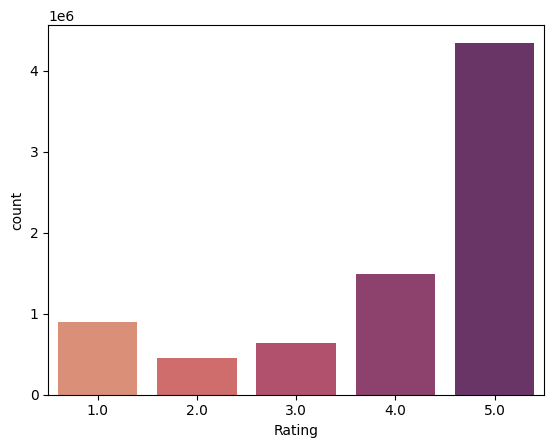

In [11]:
sns.countplot(x=df["Rating"],palette ="flare")

In [12]:
df_first_100 = df[:100]

In [13]:
df_first_100.shape

(100, 4)

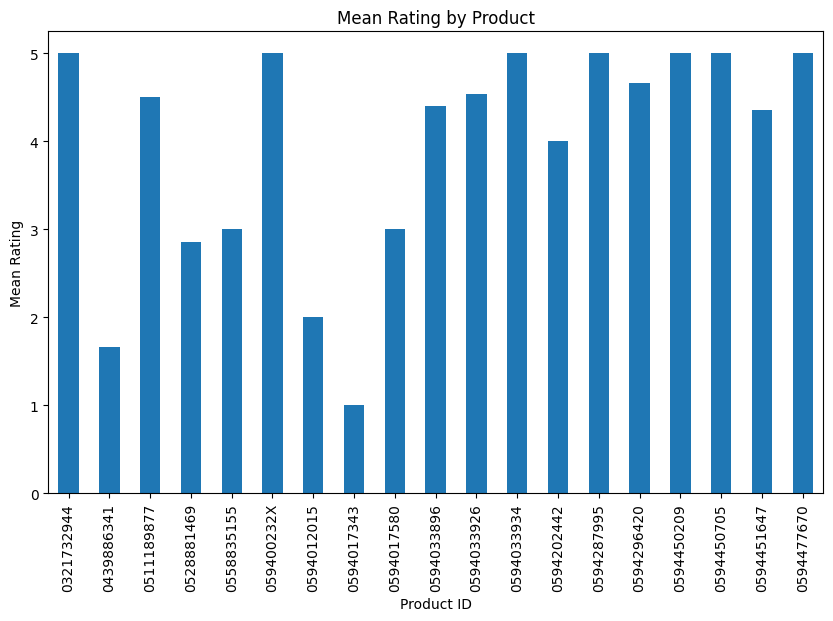

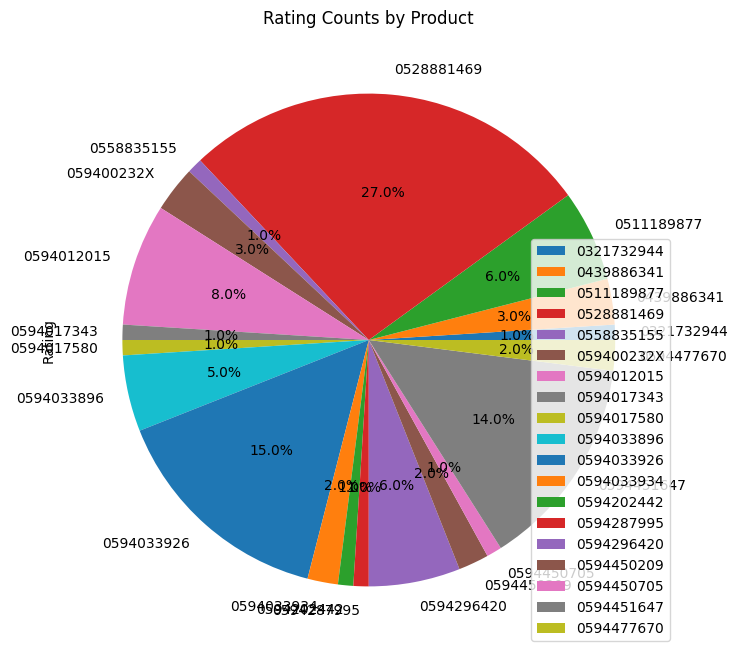

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# create a bar chart of the mean rating for each product
df_first_100.groupby('productId')['Rating'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Mean Rating by Product')
plt.xlabel('Product ID')
plt.ylabel('Mean Rating')
plt.show()

# create a pie chart of the count of ratings for each product
df_first_100.groupby('productId')['Rating'].count().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Rating Counts by Product')
plt.legend()
plt.show()


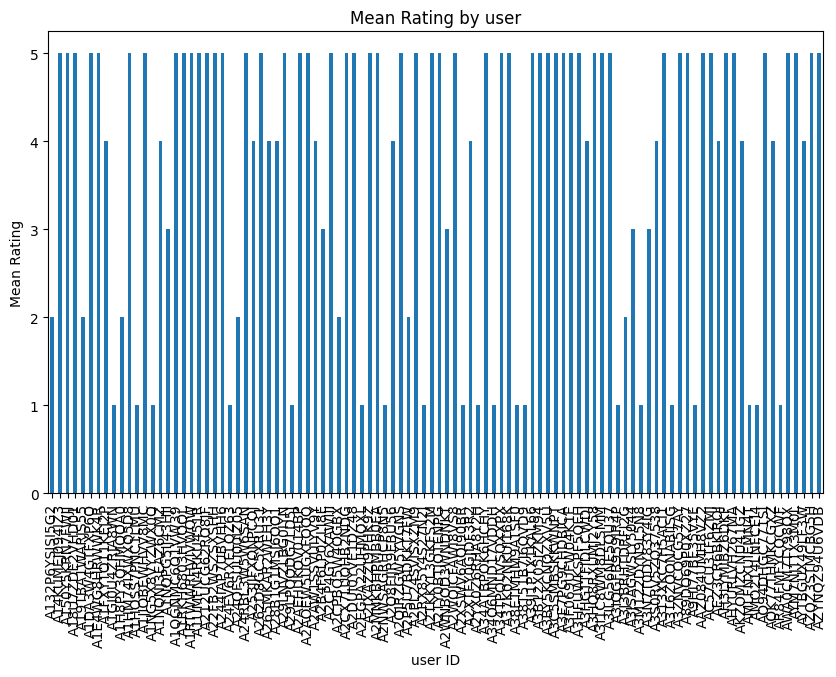

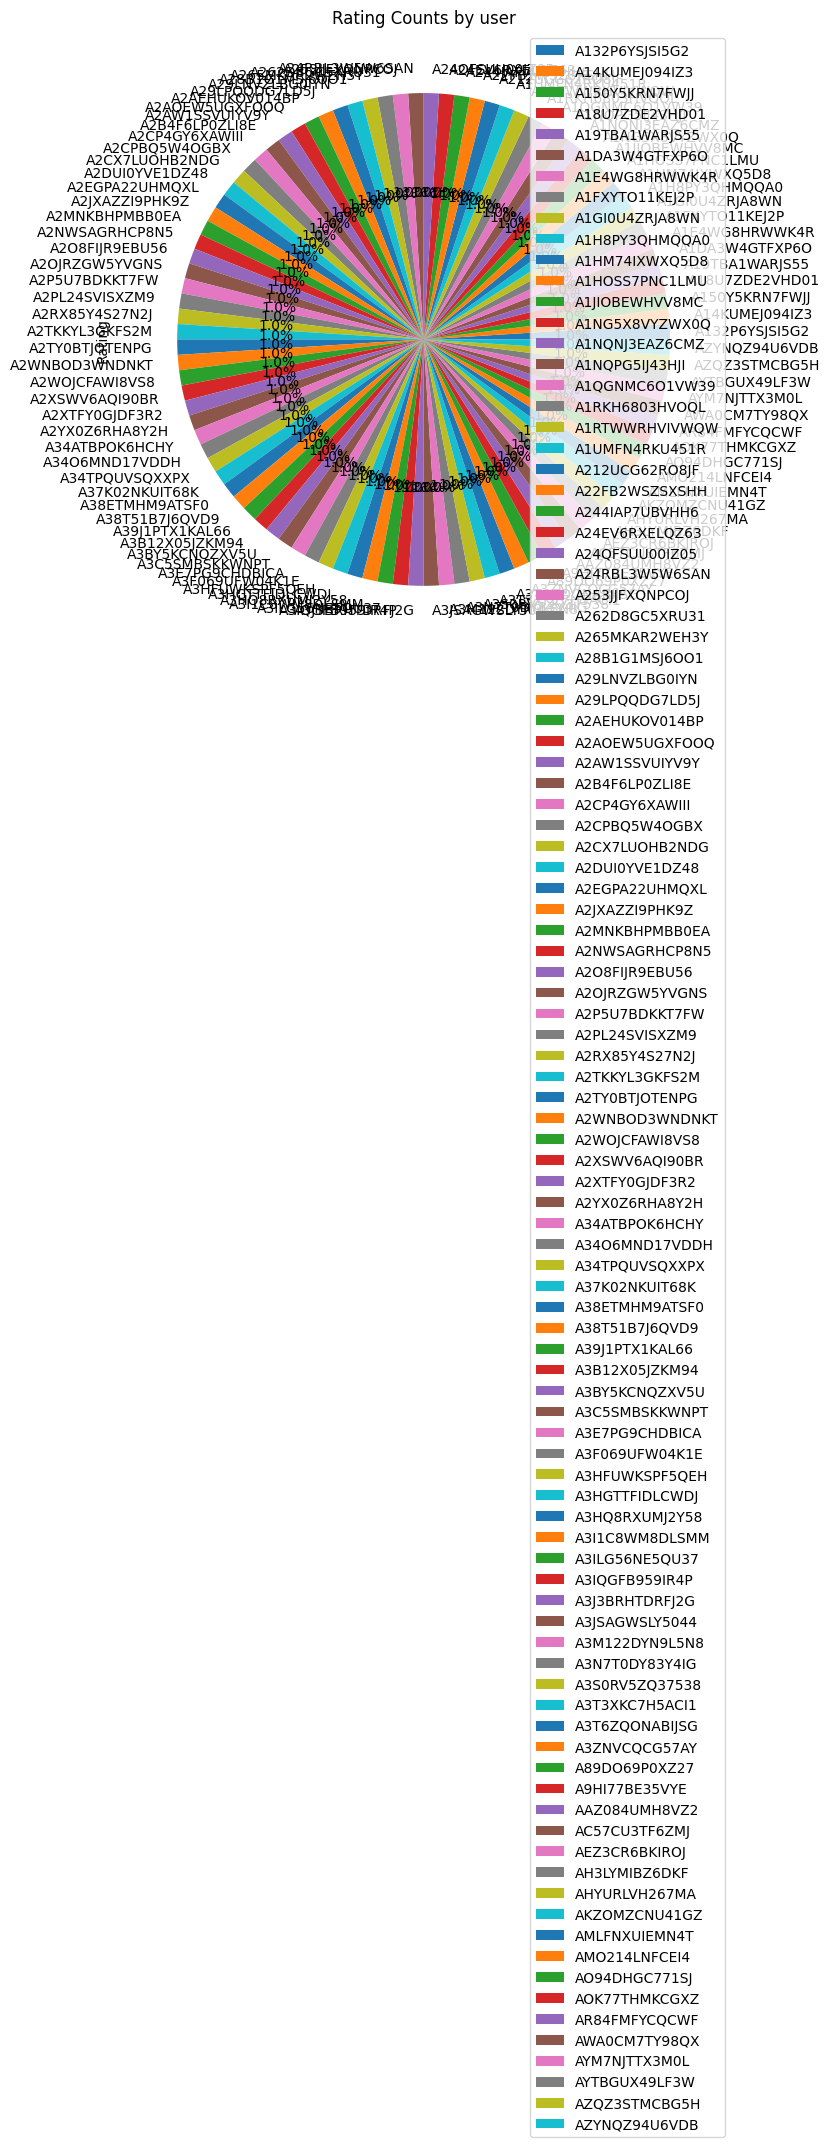

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# create a bar chart of the mean rating for each product
df_first_100.groupby('userId')['Rating'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Mean Rating by user')
plt.xlabel('user ID')
plt.ylabel('Mean Rating')
plt.show()

# create a pie chart of the count of ratings for each product
df_first_100.groupby('userId')['Rating'].count().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Rating Counts by user')
plt.legend()
plt.show()


User ID: A2CX7LUOHB2NDG
                 userId   productId  Rating   timestamp
0        A2CX7LUOHB2NDG  0321732944     5.0  1341100800
1469592  A2CX7LUOHB2NDG  B000W3LJ6Y     5.0  1344988800
1980866  A2CX7LUOHB2NDG  B001EYU79A     5.0  1349222400
6124999  A2CX7LUOHB2NDG  B0089MVZDW     4.0  1367539200


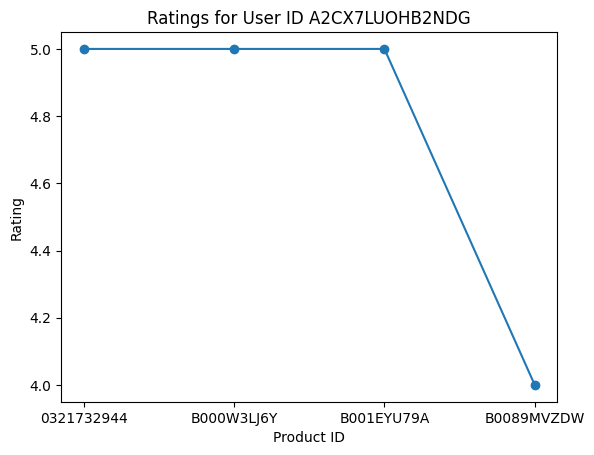

In [16]:
user_id = 'A2CX7LUOHB2NDG'
user_df = df[df['userId'] == user_id]

# print information about the user's ratings
print('User ID:', user_id)
print(user_df)

# create a plot of the user's ratings
plt.plot(user_df['productId'], user_df['Rating'], 'o-')
plt.title('Ratings for User ID ' + str(user_id))
plt.xlabel('Product ID')
plt.ylabel('Rating')
plt.show()

**collaborative filtering model**
Collaborative filtering is a technique used in recommender systems to make predictions or recommendations based on the patterns of preferences or behaviors of users. The main idea behind collaborative filtering is that if two users have similar preferences or behaviors in the past, then they are likely to have similar preferences or behaviors in the future. Similarly, if two items have been preferred or interacted with in similar ways by many users, then they are likely to be similar or related.

In [171]:
df_new = df[:10000]

In [49]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
from surprise import SVD, Reader, Dataset 
from surprise.model_selection import cross_validate

In [172]:
svd = SVD()
reader = Reader()
df_training = Dataset.load_from_df(df_new[['userId', 'productId', 'Rating']], reader)

In [173]:
df_training = df_training.build_full_trainset()
svd.fit(df_training)

In [174]:
svd.predict(uid='A2WNBOD3WNDNKT', iid='0439886341', r_ui=None).est

3.336173629765726

In [175]:
df_new.head()

,userId,productId,Rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [176]:
products = df_new['productId'].unique()
test = [['A2CX7LUOHB2NDG', iid, 4] for iid in products]
df_predictions = svd.test(test)

In [177]:
df_predictions = pd.DataFrame(df_predictions)

In [178]:
df_predictions = df_predictions.sort_values(by='est', ascending=False)
df_predictions.head()

,uid,iid,r_ui,est,details
83,A2CX7LUOHB2NDG,1615527672,4,4.815495,{'was_impossible': False}
856,A2CX7LUOHB2NDG,9985511476,4,4.811228,{'was_impossible': False}
80,A2CX7LUOHB2NDG,161552763X,4,4.769477,{'was_impossible': False}
1228,A2CX7LUOHB2NDG,B00000DM9W,4,4.756644,{'was_impossible': False}
21,A2CX7LUOHB2NDG,0594481902,4,4.679289,{'was_impossible': False}


In [179]:
y_test=df_predictions['r_ui']
ypred=df_predictions['est']

In [180]:
y_test

83      4
856     4
80      4
1228    4
21      4
       ..
269     4
33      4
1010    4
1209    4
1261    4
Name: r_ui, Length: 1304, dtype: int64

In [181]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [182]:
accuracy_score(y_test.round(), ypred.round())

0.9516871165644172

In [183]:
micro_averaged_precision = metrics.precision_score(y_test.round(), ypred.round(), average = 'micro')
print(f"Micro-Averaged Precision score using sklearn library : {micro_averaged_precision}")

Micro-Averaged Precision score using sklearn library : 0.9516871165644172


In [184]:
micro_averaged_recall = metrics.recall_score(y_test.round(), ypred.round(), average = 'micro')
print(f"Micro-Averaged recall score using sklearn library : {micro_averaged_recall}")

Micro-Averaged recall score using sklearn library : 0.9516871165644172


In [185]:
micro_averaged_f1 = metrics.f1_score(y_test.round(), ypred.round(), average = 'micro')
print(f"Micro-Averaged F1 score using sklearn library : {micro_averaged_f1}")

Micro-Averaged F1 score using sklearn library : 0.9516871165644172


In [186]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test.round(), ypred.round())
rmse = np.sqrt(mean_squared_error(y_test.round(), ypred.round()))




In [187]:
print('MAE: ', mae)
print('RMSE: ', rmse)

MAE:  0.049079754601226995
RMSE:  0.22497443617556936
